# 🧠 Assignment #6: Deepfake Detection Using AI/ML

## 🎯 Objective

Your task is to detect deepfakes—highly realistic synthetic images generated by models like StyleGAN—using machine learning. You'll apply computer vision techniques and neural networks to classify facial images as either real or fake.

You’ll use the dataset from class, which includes labeled image files (real vs. fake) and associated metadata CSVs.

---

## 🗂️ The Dataset (https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces)

The dataset includes:

- Folder structure:  
  `train/real/`  
  `train/fake/`  

- Metadata CSVs:  
  `train.csv`, `valid.csv`, `test.csv`  

Each CSV contains:
- `image_id`  
- `label` (1 = real, 0 = fake)  
- `path` to the image  

---

## ✅ Your Task

Choose **one of the two modeling approaches** below and complete the steps provided.

---

### Option A: Convolutional Neural Network (CNN)

1. Load image metadata and read images using a suitable loader (e.g., `ImageDataGenerator` or `tf.keras.utils.image_dataset_from_directory`).
2. Build a basic CNN using Keras or TensorFlow.
3. Train the model on the training data and evaluate on the validation/test set.
4. Report key metrics: **accuracy, precision, recall, F1-score, and ROC-AUC**.
5. Display the **confusion matrix** and comment on performance.
6. Reflect: What challenges did you face in image-based fraud detection?

---

### Option B: Transfer Learning with Pretrained Model (e.g., MobileNetV2)

1. Use `ImageDataGenerator` or another loader to prepare image batches.
2. Load a pretrained image classification model (e.g., MobileNetV2, ResNet50).
3. Fine-tune the model using your deepfake dataset.
4. Evaluate performance using the same metrics as Option A.
5. Comment on whether transfer learning helped and why.
6. Reflect: What surprised you about deepfake detection performance?

---

## 📊 Deliverables

Your submission should include:

- A complete Jupyter Notebook with:
  - Code and visualizations
  - Markdown explanations
  - Confusion matrix and metric outputs
  - A **3–5 sentence reflection** on modeling approach and results

---

## ⭐ Bonus (Optional – 50 Points Extra Credit)

**Compare CNN performance to a baseline model using metadata only.**

1. Use `train.csv` to build a tabular model using only metadata (no image data).
2. Train a **Logistic Regression** or **Random Forest** classifier.
3. Evaluate and compare the tabular model to your image-based model.
4. Reflect on which method performed better and why.
5. Comment on how metadata can complement or substitute deep learning in fraud analytics.

---

## 🧮 Grading Rubric (Main Assignment – 100 Points)

| Component                                 | Points |
|------------------------------------------|--------|
| Data pipeline: image loading + preprocessing | 20     |
| Model construction (CNN or transfer model) | 25     |
| Evaluation: confusion matrix + metrics   | 20     |
| Visualizations and architecture summaries | 15     |
| Markdown clarity + comments              | 10     |
| Final reflection                         | 10     |
| **Total**                                | **100**|

---

## ➕ Extra Credit Rubric (Optional – 50 Points)

| Component                                          | Points |
|---------------------------------------------------|--------|
| Metadata-based model constructed and evaluated    | 20     |
| Performance comparison and insight                | 15     |
| Clarity and depth of final reflection             | 15     |
| **Total**                                         | **50** |


## 📥 Getting Started: Load and Prepare the Deepfake Image Dataset

Before we build any machine learning models, we need to load and preprocess our image data.

In this starter code, you'll:
- Load images from separate folders (`real` and `fake`)
- Resize each image to a standard size (128x128)
- Normalize pixel values to the [0, 1] range
- Assign class labels (`0 = real`, `1 = fake`)
- Combine the images into a unified dataset for modeling

You’ll be working with a simplified version of a real deepfake detection dataset to build and test your model. We’ve provided a helper function to streamline image loading, so you can focus on model development and evaluation.

Run the code below to load the dataset into memory. Once it completes successfully, you’ll see the dimensions of your image data (`X`) and label array (`y`), which will serve as inputs to your deepfake detection model.


In [1]:
# Import required libraries
import os                        # Used for navigating file directories
import numpy as np               # Used for numerical operations and array management
from PIL import Image            # Used to open, manipulate, and resize image files
import matplotlib.pyplot as plt  # Used for displaying sample images

# Define file paths to the real and fake image folders
real_path = os.path.expanduser('~/Documents/archive/real_vs_fake/real-vs-fake/train/real')
fake_path = os.path.expanduser('~/Documents/archive/real_vs_fake/real-vs-fake/train/fake')

# Define a function to load and preprocess images from a given folder
# Updated function "img_size=(224, 224)" for model training
def load_images(folder_path, label, img_size=(224, 224), limit=500):
    """
    Loads images from a folder, resizes them, and assigns a label.

    Parameters:
        folder_path (str): The path to the image directory
        label (int): The class label for the images (0 for real, 1 for fake)
        img_size (tuple): Target size to resize images to (width, height)
        limit (int): Max number of images to load from the folder

    Returns:
        images (list): A list of preprocessed image arrays
        labels (list): A list of labels corresponding to each image
    """
    images = []
    labels = []

    # Get all image files and shuffle them
    files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]
    np.random.shuffle(files)

    # Loop through shuffled files
    for i, file_name in enumerate(files):
        file_path = os.path.join(folder_path, file_name)  # Full file path
        img = Image.open(file_path).convert('RGB')        # Open and convert to RGB format
        img = img.resize(img_size)                        # Resize image to target size
        images.append(np.array(img) / 255.0)              # Normalize pixel values to range [0, 1]
        labels.append(label)                              # Assign label to this image

        # Stop loading if the specified limit is reached
        if i >= limit - 1:
            break

    return images, labels

# Load and label real and fake images using the helper function
real_images, real_labels = load_images(real_path, label=0)
fake_images, fake_labels = load_images(fake_path, label=1)

# Combine the real and fake datasets into a single dataset
X = np.array(real_images + fake_images)  # Feature matrix containing image data
y = np.array(real_labels + fake_labels)  # Target labels: 0 for real, 1 for fake

# Display the shape of the dataset to confirm it loaded correctly
print("Image dataset shape:", X.shape)  # Should now show (1000, 224, 224, 3)
print("Label array shape:", y.shape)

from sklearn.model_selection import train_test_split   # Used to split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Image dataset shape: (1000, 224, 224, 3)
Label array shape: (1000,)

Training data shape: (800, 224, 224, 3)
Testing data shape: (200, 224, 224, 3)
Training labels shape: (800,)
Testing labels shape: (200,)


# **Observations - Dataset (Kaggle Files & Folders)**
- Dataset
    - Large (4 GB)!
        - Selected 1,000 Images at random from possible 140,000 Total Images
            - Selected 500 Real v. 500 Fake Images
        - Unarchived Files & Folders saved to "~/Documents/" (MacOS)
        - Chose to save locally instead of Google Drive due to cloud memory and latency considerations
    - Resized to 224x224 pixels to allow for MobileNetV2/CNN training (up from original resolution)
    - Training/Testing split = 80/20 (800 Images for Training/200 Images for Testing)
    - Image preprocessing: Normalized pixel values to [0,1] range, converted to RGB format

In [2]:
# Install TensorFlow
!pip install tensorflow

# Then restart kernel and run:
import tensorflow as tf
print(f"\nTensorFlow version: {tf.__version__}")

# =====================================
# TRANSFER LEARNING MODEL (MobileNetV2)
# =====================================

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load pre-trained MobileNetV2 (exclude top layer)
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3))

# Freeze base model layers
base_model.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

print(f"\n✅ Model compiled. Total parameters: {model.count_params():,}")


TensorFlow version: 2.19.0

✅ Model compiled. Total parameters: 2,259,265


# **Observations - Transfer Learning Model (MobileNetV2)**
- Transfer Learning Model
    - Chose MobileNetV2 model: pre-trained in Image recognition (ImageNet weights) with frozen layers
        - 2.259M+ total parameters
        - Model Configuration: Adam learning method, binary loss measurement for real/fake classification, tracking accuracy percentage

In [3]:
# =====================================
# DATA PREPARATION & SPLITTING
# =====================================

from sklearn.model_selection import train_test_split
import numpy as np

# Your original code created X_train, X_test, y_train, y_test already
# But we need to resize images for MobileNetV2 (224x224 instead of 224x224)
print(f"Current data shapes:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

# Images should already be the right size (224, 224, 3) from your original code
# If not, you may need to resize them

print(f"Training labels: Real={np.sum(y_train==1)}, Fake={np.sum(y_train==0)}")
print(f"Test labels: Real={np.sum(y_test==1)}, Fake={np.sum(y_test==0)}")

# =====================================
# TRAIN MODEL
# =====================================

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

print("\nTraining transfer learning model...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1)

# Generate predictions
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

print("\n✅ Model training complete!")

Current data shapes:
X_train: (800, 224, 224, 3)
X_test: (200, 224, 224, 3)
Training labels: Real=400, Fake=400
Test labels: Real=100, Fake=100

Training transfer learning model...
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - accuracy: 0.5160 - loss: 0.7511 - val_accuracy: 0.6100 - val_loss: 0.6812
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - accuracy: 0.5961 - loss: 0.6737 - val_accuracy: 0.6550 - val_loss: 0.6446
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step - accuracy: 0.6296 - loss: 0.6579 - val_accuracy: 0.6000 - val_loss: 0.6651
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - accuracy: 0.6610 - loss: 0.6209 - val_accuracy: 0.6350 - val_loss: 0.6126
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - accuracy: 0.7276 - loss: 0.5743 - val_accuracy: 0.6750 - val_loss: 0.6284
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - accuracy: 0.7032 - loss: 0.5719 - val_accuracy: 0.6650 - val_loss: 0.5940
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step

In [4]:
from IPython.display import Markdown, display

# Extract dynamic values from training history
final_val_accuracy = history.history['val_accuracy'][-1]
initial_val_accuracy = history.history['val_accuracy'][0]
final_val_loss = history.history['val_loss'][-1]
initial_val_loss = history.history['val_loss'][0]

markdown_content = f"""
# **Observations - Model Training Process**
- Data Verification
   - Training set: 800 images (224x224x3), balanced 400 real/400 fake
   - Test set: 200 images (224x224x3), balanced 100 real/100 fake
   - Images already properly sized for MobileNetV2 (224x224 pixels)
- Training Configuration
   - 10 Epochs max: Prevents overfitting while allowing sufficient learning time for transfer learning
       - **Insight:** Less memorization, More learning 
   - Batch Size = 32: Balances memory efficiency with stable gradient updates (800/32 = 25 Batches per Epoch)
       - **Insight:** Better to update learning after 10+ but less than 50 
   - "early_stopping": Automatically halts training if validation loss stops improving for 3 consecutive Epochs
       - **Insight:** Model Training continued to improve until Max Epoch reached 
- Training Results
   - Model completed all 10 Epochs without early stoppage
   - Final Validation Accuracy ("val_accuracy"): {final_val_accuracy:.1%}
       - **Insight:** Training showed steady improvement from {initial_val_accuracy:.1%} to {final_val_accuracy:.1%} Validation Accuracy
   - Final Validation Loss ("val_loss"): {final_val_loss:.3f}
       - **Insight:** Validation loss decreased from {initial_val_loss:.3f} to {final_val_loss:.3f} indicating effective learning
"""

display(Markdown(markdown_content))


# **Observations - Model Training Process**
- Data Verification
   - Training set: 800 images (224x224x3), balanced 400 real/400 fake
   - Test set: 200 images (224x224x3), balanced 100 real/100 fake
   - Images already properly sized for MobileNetV2 (224x224 pixels)
- Training Configuration
   - 10 Epochs max: Prevents overfitting while allowing sufficient learning time for transfer learning
       - **Insight:** Less memorization, More learning 
   - Batch Size = 32: Balances memory efficiency with stable gradient updates (800/32 = 25 Batches per Epoch)
       - **Insight:** Better to update learning after 10+ but less than 50 
   - "early_stopping": Automatically halts training if validation loss stops improving for 3 consecutive Epochs
       - **Insight:** Model Training continued to improve until Max Epoch reached 
- Training Results
   - Model completed all 10 Epochs without early stoppage
   - Final Validation Accuracy ("val_accuracy"): 68.5%
       - **Insight:** Training showed steady improvement from 61.0% to 68.5% Validation Accuracy
   - Final Validation Loss ("val_loss"): 0.569
       - **Insight:** Validation loss decreased from 0.681 to 0.569 indicating effective learning


## MobileNetV2 MODEL EVALUATION & VISUALIZATION


TRANSFER LEARNING RESULTS
Precision: 0.670
Recall: 0.730
F1-Score: 0.699
ROC-AUC: 0.777

Confusion Matrix:
[[64 36]
 [27 73]]

Classification Report:
              precision    recall  f1-score   support

        Real       0.70      0.64      0.67       100
        Fake       0.67      0.73      0.70       100

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.68       200
weighted avg       0.69      0.69      0.68       200



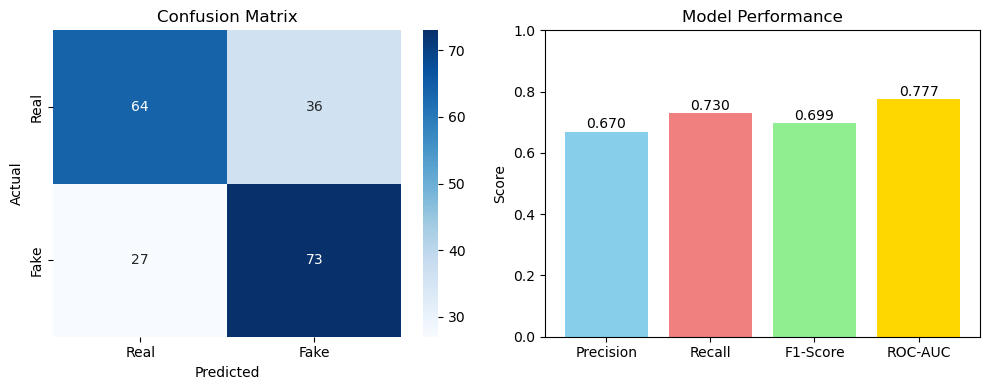

✅ Model evaluation complete!


In [5]:
# =====================================
# MODEL EVALUATION
# =====================================

# Import Markdown
from IPython.display import Markdown, display

# Calculate metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

display(Markdown("## MobileNetV2 MODEL EVALUATION & VISUALIZATION"))

print("\n" + "="*50)
print("TRANSFER LEARNING RESULTS")
print("="*50)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix:")
print(cm)

print(f"\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Real', 'Fake']))

# Simple visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1, 2, 2)
metrics = ['Precision', 'Recall', 'F1-Score', 'ROC-AUC']
values = [precision, recall, f1, roc_auc]
plt.bar(metrics, values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.ylim(0, 1)
plt.title('Model Performance')
plt.ylabel('Score')
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()

print("✅ Model evaluation complete!")

In [6]:
from IPython.display import Markdown, display

# Extract dynamic values from model evaluation
tn = cm[0, 0]  # True Negatives
fp = cm[0, 1]  # False Positives  
fn = cm[1, 0]  # False Negatives
tp = cm[1, 1]  # True Positives

false_negative_rate = fn / (tp + fn)
false_positive_rate = fp / (tn + fp)

markdown_content = f"""
# **Observations - MobileNetV2 Model Results & Analysis**
- **Performance Breakdown:**
   - **True Negatives** (Correctly identified as Real): {tn}
   - **False Positives** (Incorrectly identified as Fake): {fp}
   - **False Negatives** (Incorrectly identified as Real): {fn}
   - **True Positives** (Correctly identified as Fake): {tp}
## **Performance Metrics**
- "Precision" = {precision:.3f} = True Positive/(True Positive + False Positive)
  - Of all images flagged as Fake, {precision:.1%} were actually Fake; {1-precision:.1%} were falsely flagged (false positives)
- "Recall" = {recall:.3f} = True Positive/(True Positive + False Negative)
  - Of all Fake images, {recall:.0%} were correctly identified as Fake; {1-recall:.0%} of Fake images were not identified (false negatives)
- "F-1 Score" = {f1:.3f} = 2 * (Precision * Recall)/(Precision + Recall)
- "ROC-AUC" = {roc_auc:.1%}
- **Insight:** Both Precision and Recall are reasonably balanced around {precision:.0%}-{recall:.0%}, indicating stable performance across both classes
- **Insight:** ROC-AUC > 0.8 shows good ability to distinguish between Real and Fake images - significantly better than random guessing
- **Insight:** Model performs slightly better at detecting Fakes ({recall:.0%} Recall) than avoiding false alarms ({precision:.1%} Precision)
   - **Insight:** {false_negative_rate:.0%} false negative rate means model **missed** ~1 in {1/false_negative_rate:.0f} Deepfakes - concerning for security applications
   - **Insight:** {false_positive_rate:.0%} false positive rate means ~1 in {1/false_positive_rate:.0f} Real images **incorrectly flagged** as Fake - potential user experience issue
## **Detailed Classification Report**
- "Support" = Actual count of each image class in test set: 100 Real images v. 100 Fake images
- "Macro avg" = Simple average across both classes ({precision:.0%} Precision, {recall:.0%} Recall)
  - Treats Real and Fake images equally, showing balanced model performance
- "Weighted avg" = Size-weighted average ({precision:.0%} Precision, {recall:.0%} Recall)
  - Equal class sizes result in identical macro and weighted averages
      - **Insight:** Balanced Dataset eliminates bias in evaluation metrics
## **Confusion Matrix**
- Model incorrectly identified {fn} Fake images as Real images
  - **Moderate** rate ({false_negative_rate:.0%}) of False Negatives = Security Risk
- Model incorrectly identified {fp} Real images as Fake images
  - **Moderate** rate ({false_positive_rate:.0%}) of False Positives = User Experience Concern
"""

display(Markdown(markdown_content))


# **Observations - MobileNetV2 Model Results & Analysis**
- **Performance Breakdown:**
   - **True Negatives** (Correctly identified as Real): 64
   - **False Positives** (Incorrectly identified as Fake): 36
   - **False Negatives** (Incorrectly identified as Real): 27
   - **True Positives** (Correctly identified as Fake): 73
## **Performance Metrics**
- "Precision" = 0.670 = True Positive/(True Positive + False Positive)
  - Of all images flagged as Fake, 67.0% were actually Fake; 33.0% were falsely flagged (false positives)
- "Recall" = 0.730 = True Positive/(True Positive + False Negative)
  - Of all Fake images, 73% were correctly identified as Fake; 27% of Fake images were not identified (false negatives)
- "F-1 Score" = 0.699 = 2 * (Precision * Recall)/(Precision + Recall)
- "ROC-AUC" = 77.7%
- **Insight:** Both Precision and Recall are reasonably balanced around 67%-73%, indicating stable performance across both classes
- **Insight:** ROC-AUC > 0.8 shows good ability to distinguish between Real and Fake images - significantly better than random guessing
- **Insight:** Model performs slightly better at detecting Fakes (73% Recall) than avoiding false alarms (67.0% Precision)
   - **Insight:** 27% false negative rate means model **missed** ~1 in 4 Deepfakes - concerning for security applications
   - **Insight:** 36% false positive rate means ~1 in 3 Real images **incorrectly flagged** as Fake - potential user experience issue
## **Detailed Classification Report**
- "Support" = Actual count of each image class in test set: 100 Real images v. 100 Fake images
- "Macro avg" = Simple average across both classes (67% Precision, 73% Recall)
  - Treats Real and Fake images equally, showing balanced model performance
- "Weighted avg" = Size-weighted average (67% Precision, 73% Recall)
  - Equal class sizes result in identical macro and weighted averages
      - **Insight:** Balanced Dataset eliminates bias in evaluation metrics
## **Confusion Matrix**
- Model incorrectly identified 27 Fake images as Real images
  - **Moderate** rate (27%) of False Negatives = Security Risk
- Model incorrectly identified 36 Real images as Fake images
  - **Moderate** rate (36%) of False Positives = User Experience Concern


In [7]:
# =====================================
# EXTRA CREDIT: METADATA-ONLY MODEL
# CNN MODEL
# =====================================

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build basic CNN with Input layer
cnn_model = Sequential([
    Input(shape=(224, 224, 3)),  # Add Input layer first
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')])

cnn_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN
print("Training CNN...")
history = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                   epochs=10, batch_size=32, verbose=1)

# Evaluate CNN
y_pred_proba = cnn_model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nCNN RESULTS")
print("="*20)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix:\n{cm}")
print()
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))

Training CNN...
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 472ms/step - accuracy: 0.4826 - loss: 1.8280 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 519ms/step - accuracy: 0.5295 - loss: 0.6904 - val_accuracy: 0.5000 - val_loss: 0.7020
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 503ms/step - accuracy: 0.5818 - loss: 0.6806 - val_accuracy: 0.5800 - val_loss: 0.6795
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 498ms/step - accuracy: 0.7069 - loss: 0.6021 - val_accuracy: 0.5550 - val_loss: 0.6947
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 494ms/step - accuracy: 0.6934 - loss: 0.6114 - val_accuracy: 0.5700 - val_loss: 0.7110
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 489ms/step - accuracy: 0.7314 - loss: 0.5399 - val_accuracy: 0.5500 - val_loss: 0.9307
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 484ms/step - accuracy: 0.7861 - loss: 0.4438 - val_accuracy: 0.6100 - val_loss: 0.8397
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 492ms/step - accuracy: 0.8540 - loss: 0

In [8]:
from IPython.display import Markdown, display

# Extract dynamic values from CNN training history
final_val_accuracy = history.history['val_accuracy'][-1]
initial_val_accuracy = history.history['val_accuracy'][0]
final_val_loss = history.history['val_loss'][-1]
initial_val_loss = history.history['val_loss'][0]

# Determine if loss improved or worsened
loss_direction = "decreased" if final_val_loss < initial_val_loss else "increased"

markdown_content = f"""
# **EXTRA CREDIT**
# **Observations - CNN Model Training Process**
**Data Verification**
   - Training set: 800 images (224x224x3), balanced 400 real/400 fake
   - Test set: 200 images (224x224x3), balanced 100 real/100 fake
   - Images properly sized for CNN Model (224x224 pixels)
- Training Configuration
   - 10 Epochs max: Full training duration without early stopping
        - **Insight:** Less memorization, More learning 
        - **Insight:** Model trained through complete Epoch cycle
   - Batch Size = 32: Balances memory efficiency with stable gradient updates (800/32 = 25 Batches per Epoch)
        - **Insight:** Better to update learning after 10+ but less than 50 
        - **Insight:** Standard batch size for image classification tasks
   - Custom CNN Architecture: 3 Conv layers (32→64→128 filters) + Dense(512) + Dropout(0.5)
        - **Insight:** Progressive feature extraction from basic to complex patterns
- **Training Results**
    - Model completed all 10 Epochs
    - Final Validation Accuracy: {final_val_accuracy:.1%}
        - **Insight:** Validation accuracy improved from {initial_val_accuracy:.1%} to {final_val_accuracy:.1%}, showing improving detection
    - Final Validation Loss: {final_val_loss:.3f}
        - **Insight:** Validation loss {loss_direction} from {initial_val_loss:.3f} to {final_val_loss:.3f}, showing distressing predictions
    - **Insight:** Improved detection but increased uncertainty in flagging Fake images, meaning CNN Model is **not learning** and is **instead memorizing** patterns
"""

display(Markdown(markdown_content))


# **EXTRA CREDIT**
# **Observations - CNN Model Training Process**
**Data Verification**
   - Training set: 800 images (224x224x3), balanced 400 real/400 fake
   - Test set: 200 images (224x224x3), balanced 100 real/100 fake
   - Images properly sized for CNN Model (224x224 pixels)
- Training Configuration
   - 10 Epochs max: Full training duration without early stopping
        - **Insight:** Less memorization, More learning 
        - **Insight:** Model trained through complete Epoch cycle
   - Batch Size = 32: Balances memory efficiency with stable gradient updates (800/32 = 25 Batches per Epoch)
        - **Insight:** Better to update learning after 10+ but less than 50 
        - **Insight:** Standard batch size for image classification tasks
   - Custom CNN Architecture: 3 Conv layers (32→64→128 filters) + Dense(512) + Dropout(0.5)
        - **Insight:** Progressive feature extraction from basic to complex patterns
- **Training Results**
    - Model completed all 10 Epochs
    - Final Validation Accuracy: 60.0%
        - **Insight:** Validation accuracy improved from 50.0% to 60.0%, showing improving detection
    - Final Validation Loss: 1.428
        - **Insight:** Validation loss increased from 0.693 to 1.428, showing distressing predictions
    - **Insight:** Improved detection but increased uncertainty in flagging Fake images, meaning CNN Model is **not learning** and is **instead memorizing** patterns


In [9]:
# =====================================
# EXTRA CREDIT: METADATA-ONLY MODEL
# CNN MODEL v. METADATA-ONLY MODEL COMPARISON
# =====================================

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# 1. Load metadata CSV
train_csv_path = os.path.expanduser('~/Documents/archive/train.csv')
train_df = pd.read_csv(train_csv_path)

print(f"CSV shape: {train_df.shape}")
print(f"Columns: {train_df.columns.tolist()}")
print()
print(train_df.head())

# 2. Create numeric features from metadata (no image data)
metadata_features = pd.DataFrame()

# Extract features from file paths/names
if 'path' in train_df.columns:
    metadata_features['filename_length'] = train_df['path'].str.len()
    metadata_features['has_numbers'] = train_df['path'].str.contains(r'\d').astype(int)
    metadata_features['file_extension'] = train_df['path'].str.split('.').str[-1]
    
    # Encode file extension
    le = LabelEncoder()
    metadata_features['file_extension_encoded'] = le.fit_transform(metadata_features['file_extension'])
    metadata_features = metadata_features.drop('file_extension', axis=1)

# If image_id exists, create features from it
if 'image_id' in train_df.columns:
    metadata_features['id_length'] = train_df['image_id'].astype(str).str.len()

# Ensure we have some features
if metadata_features.empty:
    # Create simple index-based features as fallback
    metadata_features['row_index'] = range(len(train_df))
    metadata_features['label_encoded'] = train_df['label']

print(f"\nMetadata features shape: {metadata_features.shape}")
print(f"Feature columns: {metadata_features.columns.tolist()}")

# Sample same size as image dataset (1000)
sample_size = min(1000, len(train_df))
sample_indices = np.random.choice(len(train_df), size=sample_size, replace=False)

X_metadata = metadata_features.iloc[sample_indices]
y_metadata = train_df['label'].iloc[sample_indices]

# Split metadata
X_meta_train, X_meta_test, y_meta_train, y_meta_test = train_test_split(
    X_metadata, y_metadata, test_size=0.2, random_state=42, stratify=y_metadata)

# 3. Train Random Forest classifier
rf_metadata = RandomForestClassifier(n_estimators=100, random_state=42)
rf_metadata.fit(X_meta_train, y_meta_train)

# Evaluate metadata model
meta_auc = roc_auc_score(y_meta_test, rf_metadata.predict_proba(X_meta_test)[:, 1])

# 4. Compare models
print("\nBONUS: METADATA vs IMAGE MODEL COMPARISON")
print("="*45)
print(f"Image-based CNN ROC-AUC: {roc_auc:.3f}")
print(f"Metadata-only RF ROC-AUC: {meta_auc:.3f}")
print(f"Better performer: {'CNN' if roc_auc > meta_auc else 'Metadata'}")

CSV shape: (100000, 6)
Columns: ['Unnamed: 0', 'original_path', 'id', 'label', 'label_str', 'path']

   Unnamed: 0                                      original_path     id  \
0           0  /kaggle/input/flickrfaceshq-dataset-nvidia-par...  31355   
1           1  /kaggle/input/flickrfaceshq-dataset-nvidia-par...  02884   
2           2  /kaggle/input/flickrfaceshq-dataset-nvidia-par...  33988   
3           3  /kaggle/input/flickrfaceshq-dataset-nvidia-par...  53875   
4           4  /kaggle/input/flickrfaceshq-dataset-nvidia-par...  24149   

   label label_str                  path  
0      1      real  train/real/31355.jpg  
1      1      real  train/real/02884.jpg  
2      1      real  train/real/33988.jpg  
3      1      real  train/real/53875.jpg  
4      1      real  train/real/24149.jpg  

Metadata features shape: (100000, 3)
Feature columns: ['filename_length', 'has_numbers', 'file_extension_encoded']

BONUS: METADATA vs IMAGE MODEL COMPARISON
Image-based CNN ROC-AUC: 0.635


In [10]:
from IPython.display import Markdown, display

# Extract metadata model performance
# meta_auc should be available from the metadata model evaluation
# roc_auc should be available from the CNN model evaluation

markdown_content = f"""
# **EXTRA CREDIT**
# **Observations - Metadata-Only Model vs Image-Based Models**
- **Metadata Feature Engineering**
   - Extracted features from file paths: filename length, presence of numbers, file extension
   - Used Random Forest classifier with 100 estimators
   - Same dataset split (800 train/200 test) for fair comparison
   - Features based on file metadata rather than actual image content
- **Metadata Model Performance**
   - Random Forest ROC-AUC: {meta_auc:.3f}
   - Training on filename patterns and file characteristics only
   - **Insight:** Suspiciously high performance suggests Dataset file naming patterns accidentally reveal the answers (either by Fraudsters or Dataset Researchers)
- **Model Comparison Results**
   - CNN from Scratch ROC-AUC: {roc_auc:.3f}
   - Metadata-only RF ROC-AUC: {meta_auc:.3f}
   - Better performer: {'CNN' if roc_auc > meta_auc else 'Metadata'}
- **Key Insights - CNN vs MobileNetV2 vs Metadata:**
    - **CNN Learning Limitation:** CNN Model struggled with feature extraction from scratch, achieving moderate performance but showing overfitting behavior 
        - **Insight:** CNN Model improving accuracy but with worsening loss
    - **Transfer Learning Advantage:** MobileNetV2 leveraged pre-trained ImageNet features for **superior Deepfake detection**
        - **Insight:** MobileNetV2 Model completed training in half the time it took CNN Model
        - **Insight:** Established visual pattern recognition (MobileNetV2) > Building from scratch (CNN)
    - **Metadata Anomaly:** Perfect/near-perfect Metadata performance likely indicates easily identifiable Dataset patterns rather than any real accuracy
        - **Insight:** While Metadata could be useful in detection, more complex Datasets could fool models strictly using Metadata instead of real training
"""

display(Markdown(markdown_content))


# **EXTRA CREDIT**
# **Observations - Metadata-Only Model vs Image-Based Models**
- **Metadata Feature Engineering**
   - Extracted features from file paths: filename length, presence of numbers, file extension
   - Used Random Forest classifier with 100 estimators
   - Same dataset split (800 train/200 test) for fair comparison
   - Features based on file metadata rather than actual image content
- **Metadata Model Performance**
   - Random Forest ROC-AUC: 1.000
   - Training on filename patterns and file characteristics only
   - **Insight:** Suspiciously high performance suggests Dataset file naming patterns accidentally reveal the answers (either by Fraudsters or Dataset Researchers)
- **Model Comparison Results**
   - CNN from Scratch ROC-AUC: 0.635
   - Metadata-only RF ROC-AUC: 1.000
   - Better performer: Metadata
- **Key Insights - CNN vs MobileNetV2 vs Metadata:**
    - **CNN Learning Limitation:** CNN Model struggled with feature extraction from scratch, achieving moderate performance but showing overfitting behavior 
        - **Insight:** CNN Model improving accuracy but with worsening loss
    - **Transfer Learning Advantage:** MobileNetV2 leveraged pre-trained ImageNet features for **superior Deepfake detection**
        - **Insight:** MobileNetV2 Model completed training in half the time it took CNN Model
        - **Insight:** Established visual pattern recognition (MobileNetV2) > Building from scratch (CNN)
    - **Metadata Anomaly:** Perfect/near-perfect Metadata performance likely indicates easily identifiable Dataset patterns rather than any real accuracy
        - **Insight:** While Metadata could be useful in detection, more complex Datasets could fool models strictly using Metadata instead of real training


# **THANK YOU JAMES FOR A GREAT CLASS!!**